In [1]:
import simulationlib as sl
import lasinglib as ll
import measurelib as ml
%matplotlib widget
import annealing_database as ad

import modulators as mo
import shapes

import numpy as np
import matplotlib.pyplot as plt

import logging
import os



DBPATH = "./annealing records/50umAl_ASB.dill"
database = ad.DatabaseWrapper(DBPATH)

# write directly to TAP...
TAP_dbpath = r"C:\Users\ssuub\Desktop\MPSD-TAP\TAPV-2\Application\pythonFiles\DataTextFiles"

In [2]:
# This works for most sequences and is reasonably fast to simulate
CHIP = sl.SimGrid(dimension=32, resolution=101, thickness=0.03, use_spar=False,
                  spar_thickness=0.5, spar_width=1)

SILICON = sl.Material(diffusivity=88, emissivity=0.09, specific_heat=0.7, density=0.002329002)

# 19.9.2024 actually usable coord area with a reasonable fraction of full intensity:
# this is due to bad ca libration
x_domain = [2.5, 32.5] # x = 2.5 should be xmin = 1, x=32.5 should be xmax = 31
y_domain = [-4, 26] # y = -4 should be ymin = 1, y = 26 should by ymax = 31

# make sure these line up with the ones declared in TAP's settings; these are used to zero edges out better.
CENTERING_OFFSETS = (-2, -1.5)

LaserSequence(['Pulse(6.000W, 0.000 + 10.000S -> 10.000NOMOD)', 'Pulse(6.000W, 100.000 + 10.000S -> 110.000NOMOD)', 'Pulse(6.000W, 200.000 + 10.000S -> 210.000NOMOD)', 'Pulse(6.000W, 300.000 + 10.000S -> 310.000NOMOD)', 'Pulse(6.000W, 400.000 + 10.000S -> 410.000NOMOD)', 'Pulse(6.000W, 500.000 + 10.000S -> 510.000NOMOD)', 'Pulse(6.000W, 600.000 + 10.000S -> 610.000NOMOD)', 'and 534 additional pulse(s).'])


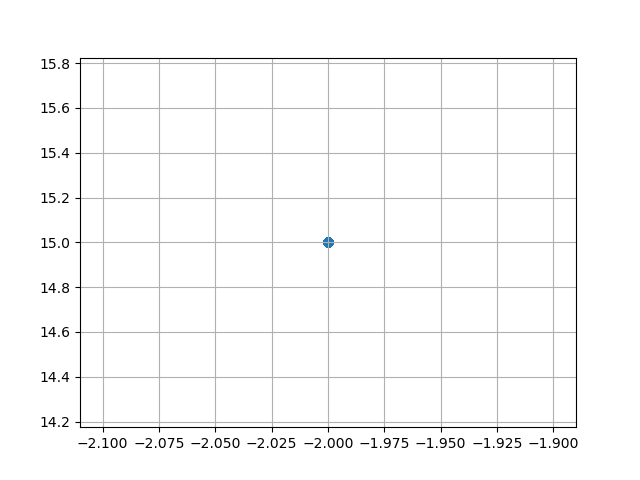

In [4]:
# Design your annealing cycle here
pulses = [ll.LaserPulse(grid=CHIP, start=0, duration=10, position=(-2, 15), power=6, sigma=ll.DEFAULT_LASER_SIGMA)] * 540

seq = ll.LaserSequence(pulses, delay=90, start_time=0)

seq.build_trace()
print(seq)
fig, ax = plt.subplots()
ax.scatter(seq.trace_x, seq.trace_y)
ax.grid()

In [5]:
# write seq to TAP cycle code
seq.write_to_cycle_code(TAP_dbpath + "/michaeltest1.txt", 0.1, *CENTERING_OFFSETS)